In [16]:
!pip install datasets -q
!pip install transformers -q
#!pip install tokenizers -q
!pip install sentencepiece -q

In [1]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import load_dataset
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\jorgen\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_name = "navjordj/SNL_summarization"
token_name = "navjordj/t5-large-snl-2"

In [3]:
tokenizer1 = T5Tokenizer.from_pretrained("navjordj/t5-large-snl-2")
tokenizer2 = T5Tokenizer.from_pretrained("navjordj/t5-base-snl")


Downloading: 100%|██████████| 4.31M/4.31M [00:00<00:00, 6.41MB/s]
Downloading: 100%|██████████| 74.0/74.0 [00:00<00:00, 73.2kB/s]
Downloading: 100%|██████████| 447/447 [00:00<00:00, 446kB/s]


In [4]:
print(tokenizer1.vocab_file)
print(tokenizer2.vocab_file)

C:\Users\jorgen/.cache\huggingface\hub\models--navjordj--t5-large-snl-2\snapshots\69ae9ba6d0ae45e7940df3129d5c0a38c2ab5ad8\spiece.model
C:\Users\jorgen/.cache\huggingface\hub\models--navjordj--t5-base-snl\snapshots\f236852541341a0bd260fc7fc3dbdd27fc33c99b\spiece.model


Using custom data configuration navjordj--SNL_summarization-d89e75929608302f
Found cached dataset parquet (C:/Users/jorgen/.cache/huggingface/datasets/navjordj___parquet/navjordj--SNL_summarization-d89e75929608302f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 3/3 [00:00<00:00, 149.96it/s]


In [6]:
split = "train"

data = dataset[split]

In [8]:
# Add two columns to train_df with the number of characters in the ingress and article


In [9]:
np.unique(df["category"], return_counts=True)

(array(['Store norske leksikon,Biologi,Arker',
        'Store norske leksikon,Biologi,Bakterier,Blågrønnbakterier',
        'Store norske leksikon,Biologi,Det gule riket', ...,
        'Store norske leksikon,Økonomi og næringsliv,Samfunnsøkonomi,Økonomisk historie',
        'Store norske leksikon,Økonomi og næringsliv,Samfunnsøkonomi,Økonomisk politikk',
        'Store norske leksikon,Økonomi og næringsliv,Skatter og avgifter'],
       dtype=object),
 array([1, 1, 1, ..., 2, 3, 9], dtype=int64))

In [10]:
# Mean and meadiian of the number of characters in the ingress and article
print("Mean number of characters in the ingress: ", df["ingress_length"].mean())
print("Median number of characters in the ingress: ", df["ingress_length"].median())
print("Mean number of characters in the article: ", df["article_length"].mean())
print("Median number of characters in the article: ", df["article_length"].median())

Mean number of characters in the ingress:  238.59306602906014
Median number of characters in the ingress:  210.0
Mean number of characters in the article:  1967.8777818649992
Median number of characters in the article:  1000.0


Text(0.5, 0.98, 'Distribution of number of characters in ingress and article of navjordj/SNL_summarization')

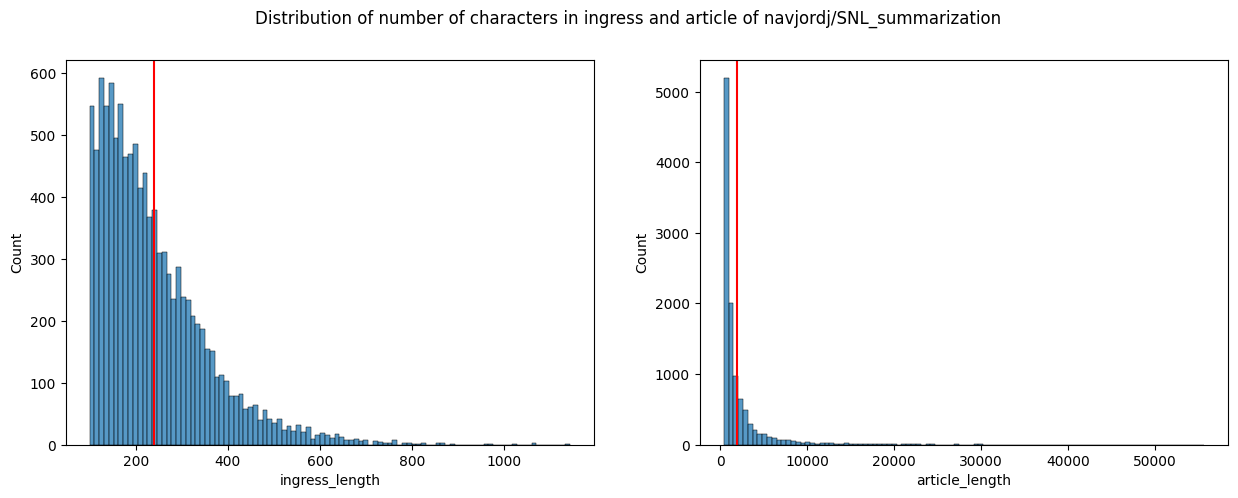

In [11]:
# Plot the disributions of the number of characters in the ingress and article with a binned histogram. The two plot stacked horizontally. Add a vertical line at the mean of the distributions. Add a title to the plot.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df["ingress_length"], ax=ax[0], bins=100)
sns.histplot(df["article_length"], ax=ax[1], bins=100)
ax[0].axvline(df["ingress_length"].mean(), color="red")
ax[1].axvline(df["article_length"].mean(), color="red")
fig.suptitle(f"Distribution of number of characters in ingress and article of {dataset_name}")

In [12]:
# Add two columns to train_df with the number of characters in the ingress and article
df["ingress_n_words"] = df["ingress"].str.split().apply(len)
df["article_n_words"] = df["article"].str.split().apply(len)

In [13]:
# Mean and meadiian of the number of characters in the ingress and article
print("Mean number of words in the ingress: ", df["ingress_n_words"].mean())
print("Median number of words in the ingress: ", df["ingress_n_words"].median())
print("Mean number of words in the article: ", df["article_n_words"].mean())
print("Median number of words in the article: ", df["article_n_words"].median())

Mean number of words in the ingress:  36.488596652565754
Median number of words in the ingress:  32.0
Mean number of words in the article:  295.0125988596653
Median number of words in the article:  149.0


Text(0.5, 0.98, 'Distribution of number of words in ingress and article of navjordj/SNL_summarization')

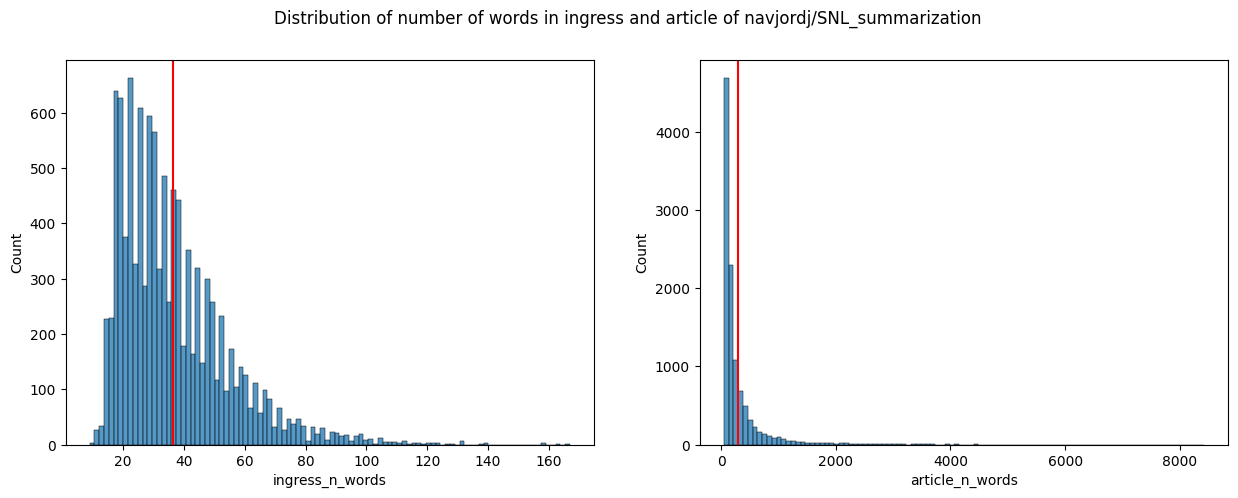

In [14]:
# Plot the disributions of the number of characters in the ingress and article with a binned histogram. The two plot stacked horizontally. Add a vertical line at the mean of the distributions. Add a title to the plot.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df["ingress_n_words"], ax=ax[0], bins=100)
sns.histplot(df["article_n_words"], ax=ax[1], bins=100)
ax[0].axvline(df["ingress_n_words"].mean(), color="red")
ax[1].axvline(df["article_n_words"].mean(), color="red")
fig.suptitle(f"Distribution of number of words in ingress and article of {dataset_name}")

In [18]:
tokenizer1(df["ingress"].iloc[0])

{'input_ids': [9146, 285, 298, 192867, 567, 289, 259, 114161, 259, 60431, 261, 289, 526, 269, 6405, 12925, 16980, 259, 266, 1349, 15463, 6813, 260, 2437, 259, 161919, 299, 259, 30501, 24948, 1058, 340, 35631, 259, 76414, 1793, 259, 42292, 70314, 259, 266, 7362, 373, 530, 9853, 4564, 7248, 278, 259, 266, 21169, 260, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [19]:
# Mean and meadiian of the number of tokens in the ingress and article
print("Mean number of tokens in the ingress: ", df["ingress_n_tokens"].mean())
print("Median number of tokens in the ingress: ", df["ingress_n_tokens"].median())
print("Mean number of tokens in the article: ", df["article_n_tokens"].mean())
print("Median number of tokens in the article: ", df["article_n_tokens"].median())

Mean number of tokens in the ingress:  68.2113297774508
Median number of tokens in the ingress:  61.0
Mean number of tokens in the article:  556.7166636012507
Median number of tokens in the article:  282.5


Text(0.5, 0.98, 'Distribution of number of tokens in ingress and article of navjordj/SNL_summarization')

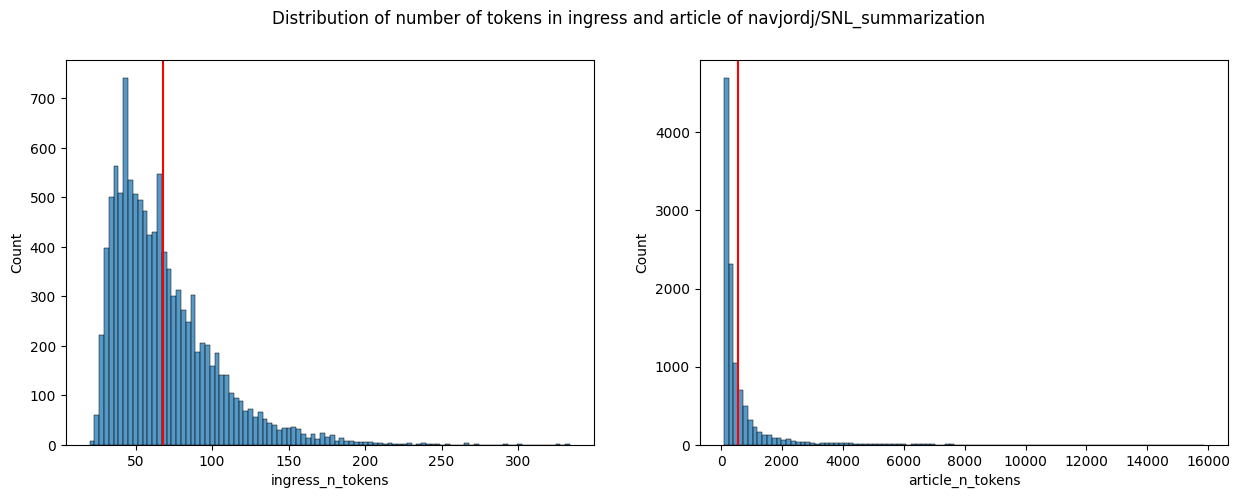

In [20]:
# Plot the disributions of the number of characters in the ingress and article with a binned histogram. The two plot stacked horizontally. Add a vertical line at the mean of the distributions. Add a title to the plot.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df["ingress_n_tokens"], ax=ax[0], bins=100)
sns.histplot(df["article_n_tokens"], ax=ax[1], bins=100)
ax[0].axvline(df["ingress_n_tokens"].mean(), color="red")
ax[1].axvline(df["article_n_tokens"].mean(), color="red")
fig.suptitle(f"Distribution of number of tokens in ingress and article of {dataset_name}")

In [24]:
!pip install plotly -q

In [25]:
import plotly.graph_objs as go
import plotly.subplots as sp
import numpy as np
BINS = 50

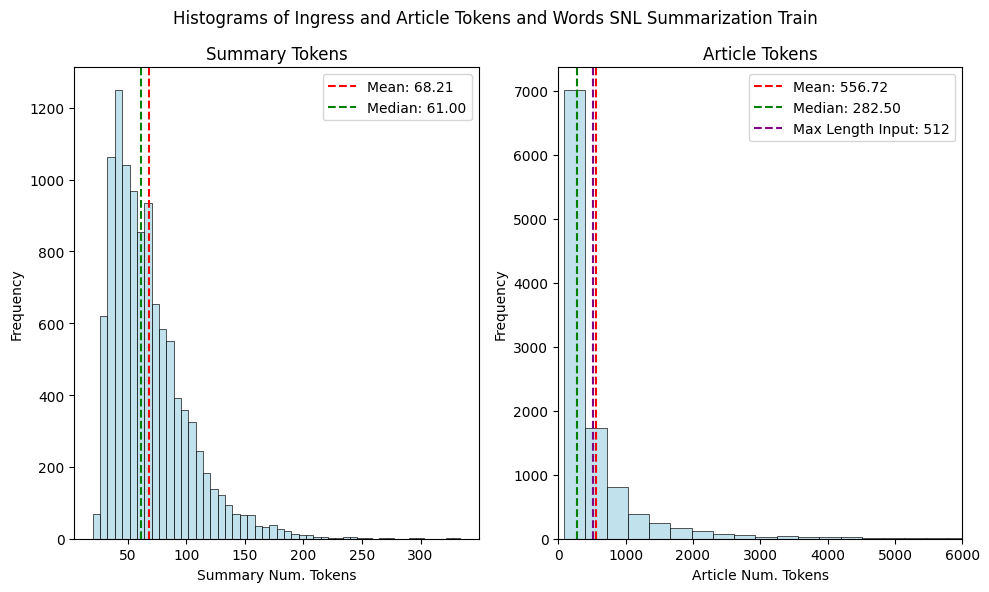

In [34]:
dataset = load_dataset("navjordj/SNL_summarization")

data1 = df["ingress_n_tokens"]
data2 = df["article_n_tokens"]
data3 = df["ingress_n_words"]
data4 =  df["article_n_words"]

mean1, median1 = np.mean(data1), np.median(data1)
mean2, median2 = np.mean(data2), np.median(data2)
mean3, median3 = np.mean(data3), np.median(data3)
mean4, median4 = np.mean(data4), np.median(data4)

medians = [np.median(data) for data in [data1, data2, data3, data4]]
means = [np.mean(data) for data in [data1, data2, data3, data4]]


# Your existing code for data and calculations

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle("Histograms of Ingress and Article Tokens and Words SNL Summarization Train")

# Plot histograms with mean and median lines
hist_data = [data1, data2]# , data3, data4]
titles = ["Summary Tokens", "Article Tokens"]

for i, (data, mean, median, title) in enumerate(zip(hist_data, means, medians, titles)):
    row, col = divmod(i, 2)

    sns.histplot(ax=axes[i], data=data, bins=BINS, kde=False, color="lightblue")
    axes[i].axvline(mean, color="red", linestyle="--", label=f"Mean: {mean:.2f}")
    axes[i].axvline(median, color="green", linestyle="--", label=f"Median: {median:.2f}")
    if "Tokens" in title:
        if "Article" in title:
            axes[i].axvline(512, color="purple", linestyle="--", label=f"Max Length Input: 512")
    axes[i].set_title(title)
    axes[i].legend()

# Set x and y axis labels
axes[0].set(xlabel="Summary Num. Tokens", ylabel="Frequency")
axes[1].set(xlabel="Article Num. Tokens", ylabel="Frequency", xlim=(0,6000))

plt.tight_layout()
plt.savefig(f"{dataset_name.split('/')[-1]}_{split}_distribution.png")
plt.show()

In [40]:
def tokenize(text):
    return tokenizer1(text).input_ids

dataset = load_dataset("navjordj/SNL_summarization")

data = dataset["train"]
df = data.to_pandas()

df["ingress_length"] = df["ingress"].str.len() 
df["article_length"] = df["article"].str.len() 

# Add two columns to train_df with the number of characters in the ingress and article
df["ingress_tokens"] = df["ingress"].apply(tokenize)
df["article_tokens"] = df["article"].apply(tokenize)

# Add two columns to train_df with the number of characters in the ingress and article
df["ingress_n_tokens"] = df["ingress_tokens"].apply(len)
df["article_n_tokens"] = df["article_tokens"].apply(len)

data1 = df["ingress_n_tokens"]
data2 = df["article_n_tokens"]

Using custom data configuration navjordj--SNL_summarization-d89e75929608302f
Found cached dataset parquet (C:/Users/jorgen/.cache/huggingface/datasets/navjordj___parquet/navjordj--SNL_summarization-d89e75929608302f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 3/3 [00:00<00:00, 374.71it/s]


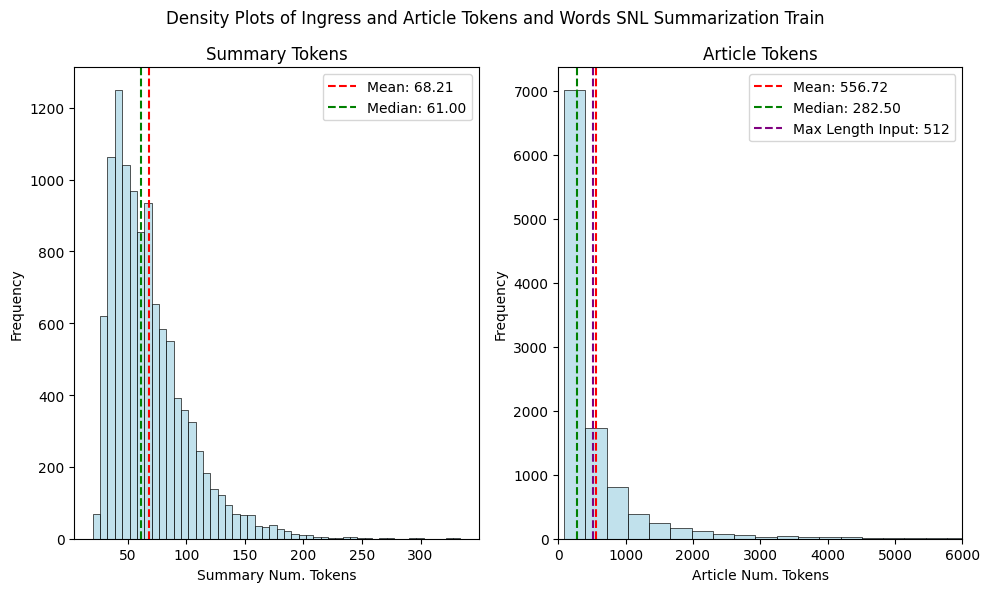

In [42]:


mean1, median1 = np.mean(data1), np.median(data1)
mean2, median2 = np.mean(data2), np.median(data2)

medians = [np.median(data) for data in [data1, data2]]
means = [np.mean(data) for data in [data1, data2]]

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle("Density Plots of Ingress and Article Tokens and Words SNL Summarization Train")

hist_data = [data1, data2]
titles = ["Summary Tokens", "Article Tokens"]

for i, (data, mean, median, title) in enumerate(zip(hist_data, means, medians, titles)):
    row, col = divmod(i, 2)

    sns.histplot(ax=axes[i], data=data, bins=BINS, kde=False, color="lightblue")
    axes[i].axvline(mean, color="red", linestyle="--", label=f"Mean: {mean:.2f}")
    axes[i].axvline(median, color="green", linestyle="--", label=f"Median: {median:.2f}")
    if "Tokens" in title:
        if "Article" in title:
            axes[i].axvline(512, color="purple", linestyle="--", label=f"Max Length Input: 512")
    axes[i].set_title(title)
    axes[i].legend()

# Set x and y axis labels
axes[0].set(xlabel="Summary Num. Tokens", ylabel="Frequency")
axes[1].set(xlabel="Article Num. Tokens", ylabel="Frequency", xlim=(0,6000))

plt.tight_layout()
plt.savefig(f"{dataset_name.split('/')[-1]}_{split}_distribution.png")
plt.show()


In [ ]:
from google.colab import files

In [ ]:



fig = sp.make_subplots(rows=2, cols=2, subplot_titles=("Ingress Tokens", "Article Tokens", "Ingress Words", "Article Words"))

# Add histograms to the grid and store the histogram objects
hist1 = go.Histogram(x=data1, nbinsx=BINS, name="Ingress token length", %colors)
hist2 = go.Histogram(x=data2, nbinsx=BINS, name="Article token length")
hist3 = go.Histogram(x=data3, nbinsx=BINS, name="Ingress word length")
hist4 = go.Histogram(x=data4, nbinsx=BINS, name="Article word length")

y_max_values = []
for hist in [hist1, hist2, hist3, hist4]:
    hist_, _ = np.histogram(hist.x, bins=BINS)
    y_max_values.append(max(hist_)*1.3)

fig.add_trace(hist1, row=1, col=1)
fig.add_trace(hist2, row=1, col=2)
fig.add_trace(hist3, row=2, col=1)
fig.add_trace(hist4, row=2, col=2)

# Get the maximum y-value for each histogram


# Add vertical lines for mean and median
for i, (mean, median, y_max) in enumerate(zip(means, medians, y_max_values)):
    row, col = divmod(i, 2)
    row += 1
    col += 1

    fig.add_shape(type="line", x0=mean, x1=mean, y0=0, y1=y_max,
                  xref="x{}".format(i+1), yref="y{}".format(i+1),
                  line=dict(color="red"), row=row, col=col)
    fig.add_shape(type="line", x0=median, x1=median, y0=0, y1=y_max,
                  xref="x{}".format(i+1), yref="y{}".format(i+1),
                  line=dict(color="green"), row=row, col=col)

# Update layout and axis titles
fig.update_layout(title_text="Histograms of Ingress and Article Tokens and Words")
fig.update_xaxes(title_text="Ingress Token Length", row=1, col=1)
fig.update_xaxes(title_text="Article Token Length", row=1, col=2)
fig.update_xaxes(title_text="Ingress Word Length", row=2, col=1)
fig.update_xaxes(title_text="Article Word Length", row=2, col=2)

fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=2, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=2)


# Update the appearance of the histograms
fig.update_traces(marker=dict(line=dict(width=1, color='black')))

# Customize the layout
fig.update_layout(
    title_x=0.5,
    showlegend=False,
    #template="plotly_dark",
    autosize=False,
    width=1000,
    height=800,
    margin=dict(l=50, r=50, b=100, t=100),
    #showlegend=True,
)

# Show the plot
fig.show()







In [ ]:

for hist in [hist1, hist2, hist3, hist4]:
    print(max(hist.x))
    print(hist)
    print(len(hist.y))

334
Histogram({
    'name': 'Ingress token length', 'nbinsx': 50, 'x': array([53, 54, 56, ..., 77, 50, 59])
})


TypeError: ignored